In [127]:
import sys
sys.path.append('../')

import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

from helpers.cm26 import DatasetCM26
from helpers.selectors import select_NA, select_Pacific, select_Cem, select_globe, compare, plot, select_ACC
from helpers.operators import Coarsen, Filtering, Subsampling, CoarsenKochkov, CoarsenWeighted, CoarsenKochkovMinMax
from helpers.state_functions import *

import hvplot.xarray
import hvplot
import cmocean

%load_ext autoreload
%autoreload 3

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
%%time 
ds = DatasetCM26(source='cmip6-3d')

CPU times: user 29 s, sys: 10.7 s, total: 39.7 s
Wall time: 37.7 s


In [43]:
%%time
coarse = ds.coarsen(factor=9, coarsening=CoarsenKochkovMinMax())

CPU times: user 6.03 s, sys: 920 ms, total: 6.95 s
Wall time: 6.31 s


In [44]:
%%time
filter = ds.coarsen(factor=1, FGR_multiplier=9, coarsening=CoarsenKochkovMinMax())

CPU times: user 223 ms, sys: 378 ms, total: 601 ms
Wall time: 161 ms


In [45]:
%%time
coarse_filter = ds.coarsen(factor=3, FGR_multiplier=3, coarsening=CoarsenKochkovMinMax())

CPU times: user 13.5 s, sys: 2.53 s, total: 16 s
Wall time: 13.6 s


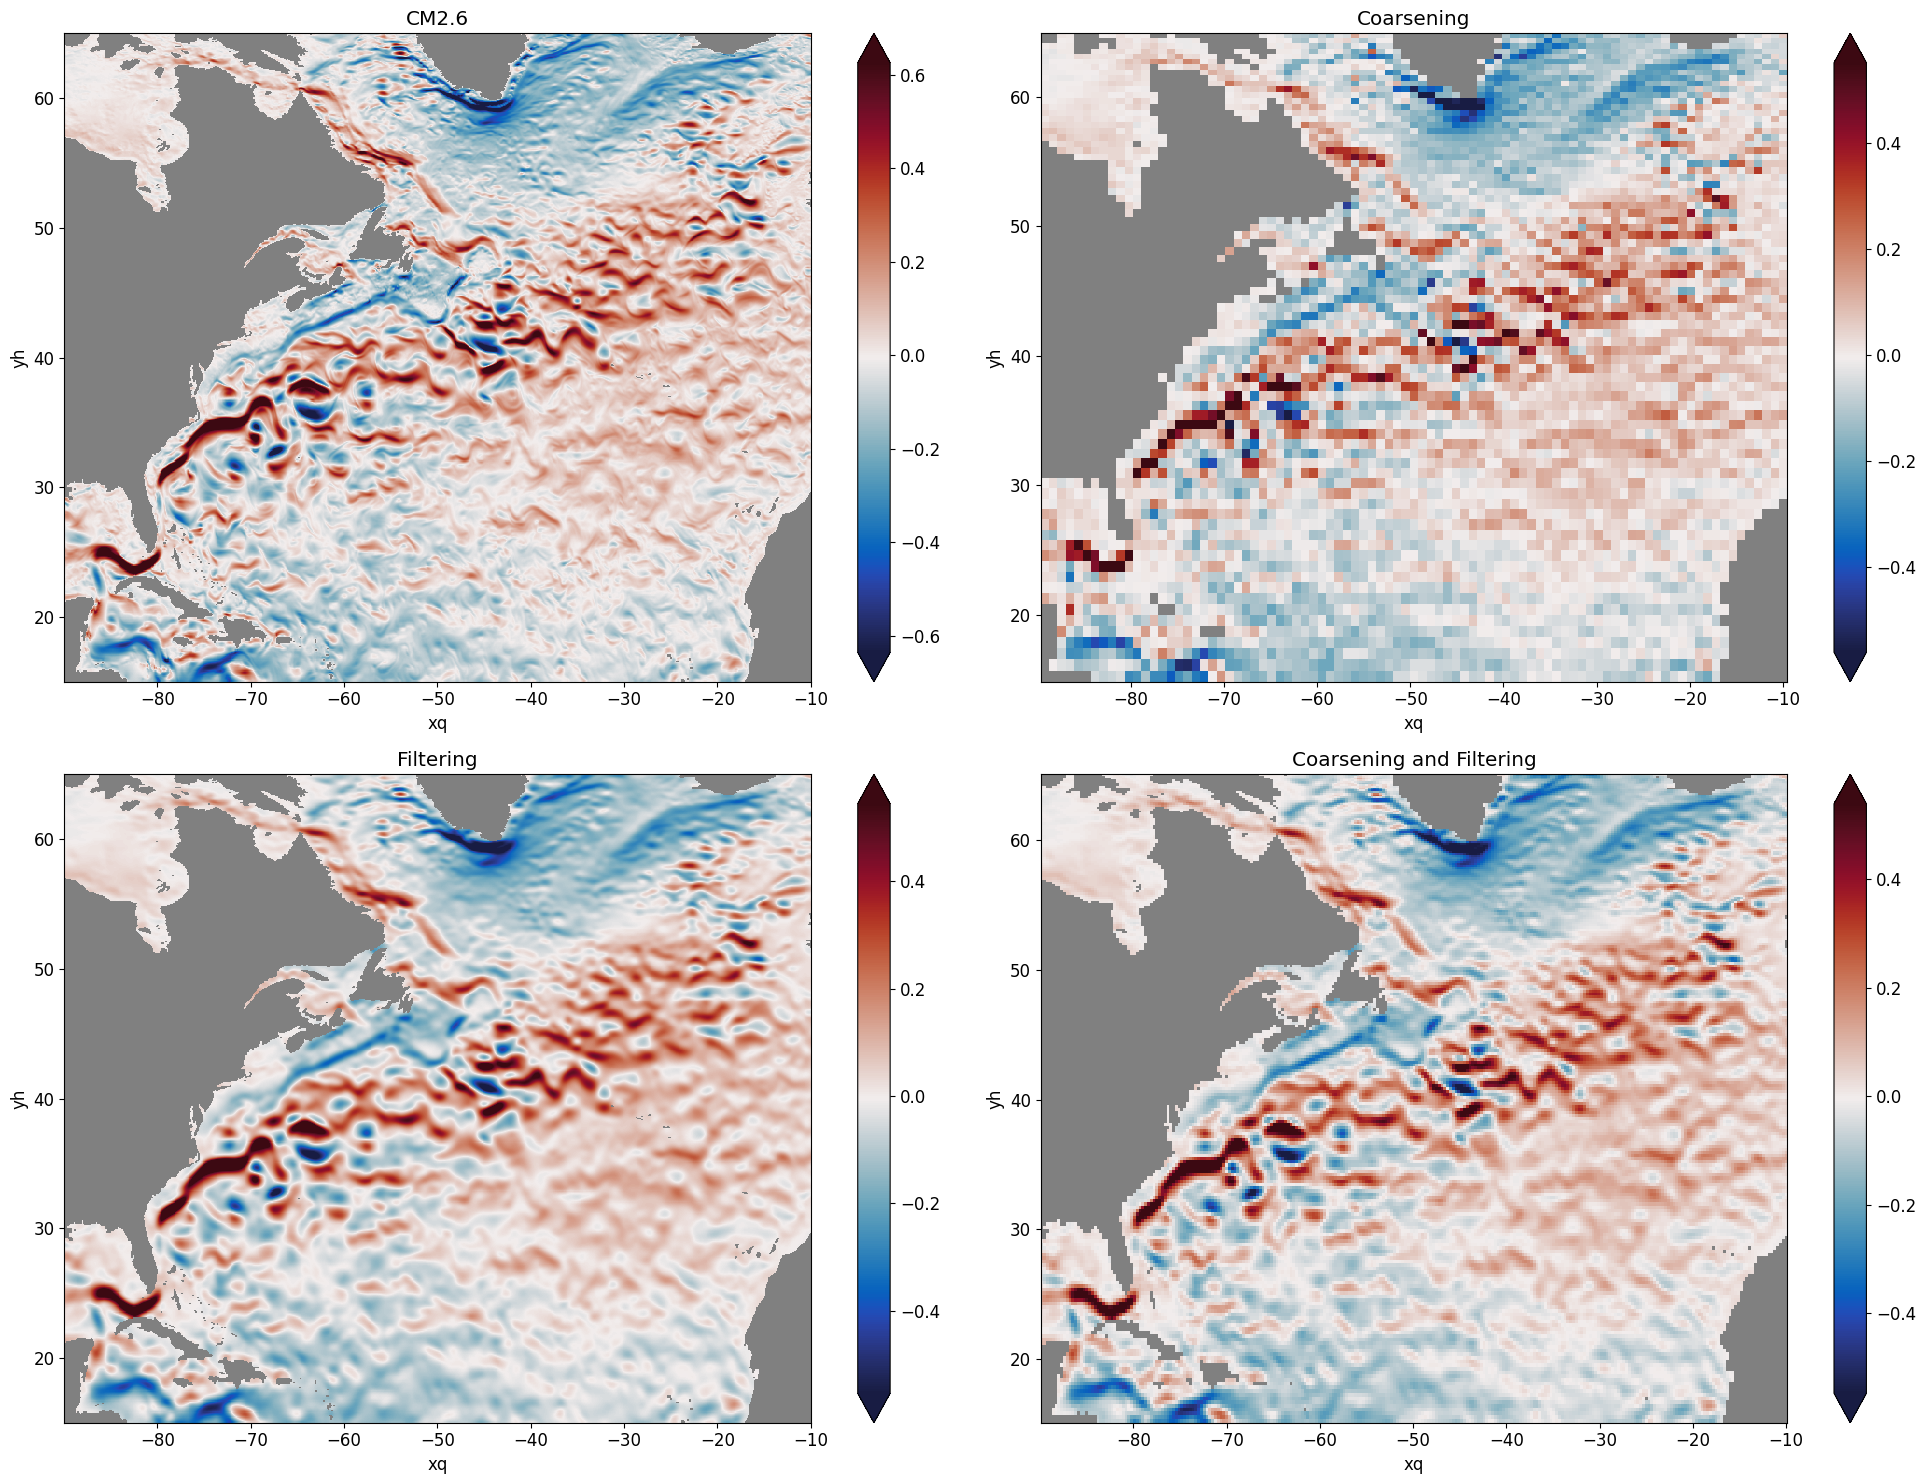

In [46]:
plt.figure(figsize=(20,15))
plt.rcParams['font.size'] = 12
plt.subplot(2,2,1)
plot(ds.data.u.isel(time=0,zl=0), ds.param.wet_u[0], cartopy=False)
plt.title('CM2.6')

plt.subplot(2,2,2)
plot(coarse.data.u.isel(time=0,zl=0), coarse.param.wet_u[0], cartopy=False)
plt.title('Coarsening')

plt.subplot(2,2,3)
plot(filter.data.u.isel(time=0,zl=0), filter.param.wet_u[0], cartopy=False)
plt.title('Filtering')

plt.subplot(2,2,4)
plot(coarse_filter.data.u.isel(time=0,zl=0), coarse_filter.param.wet_u[0], cartopy=False)
plt.title('Coarsening and Filtering')

plt.tight_layout()

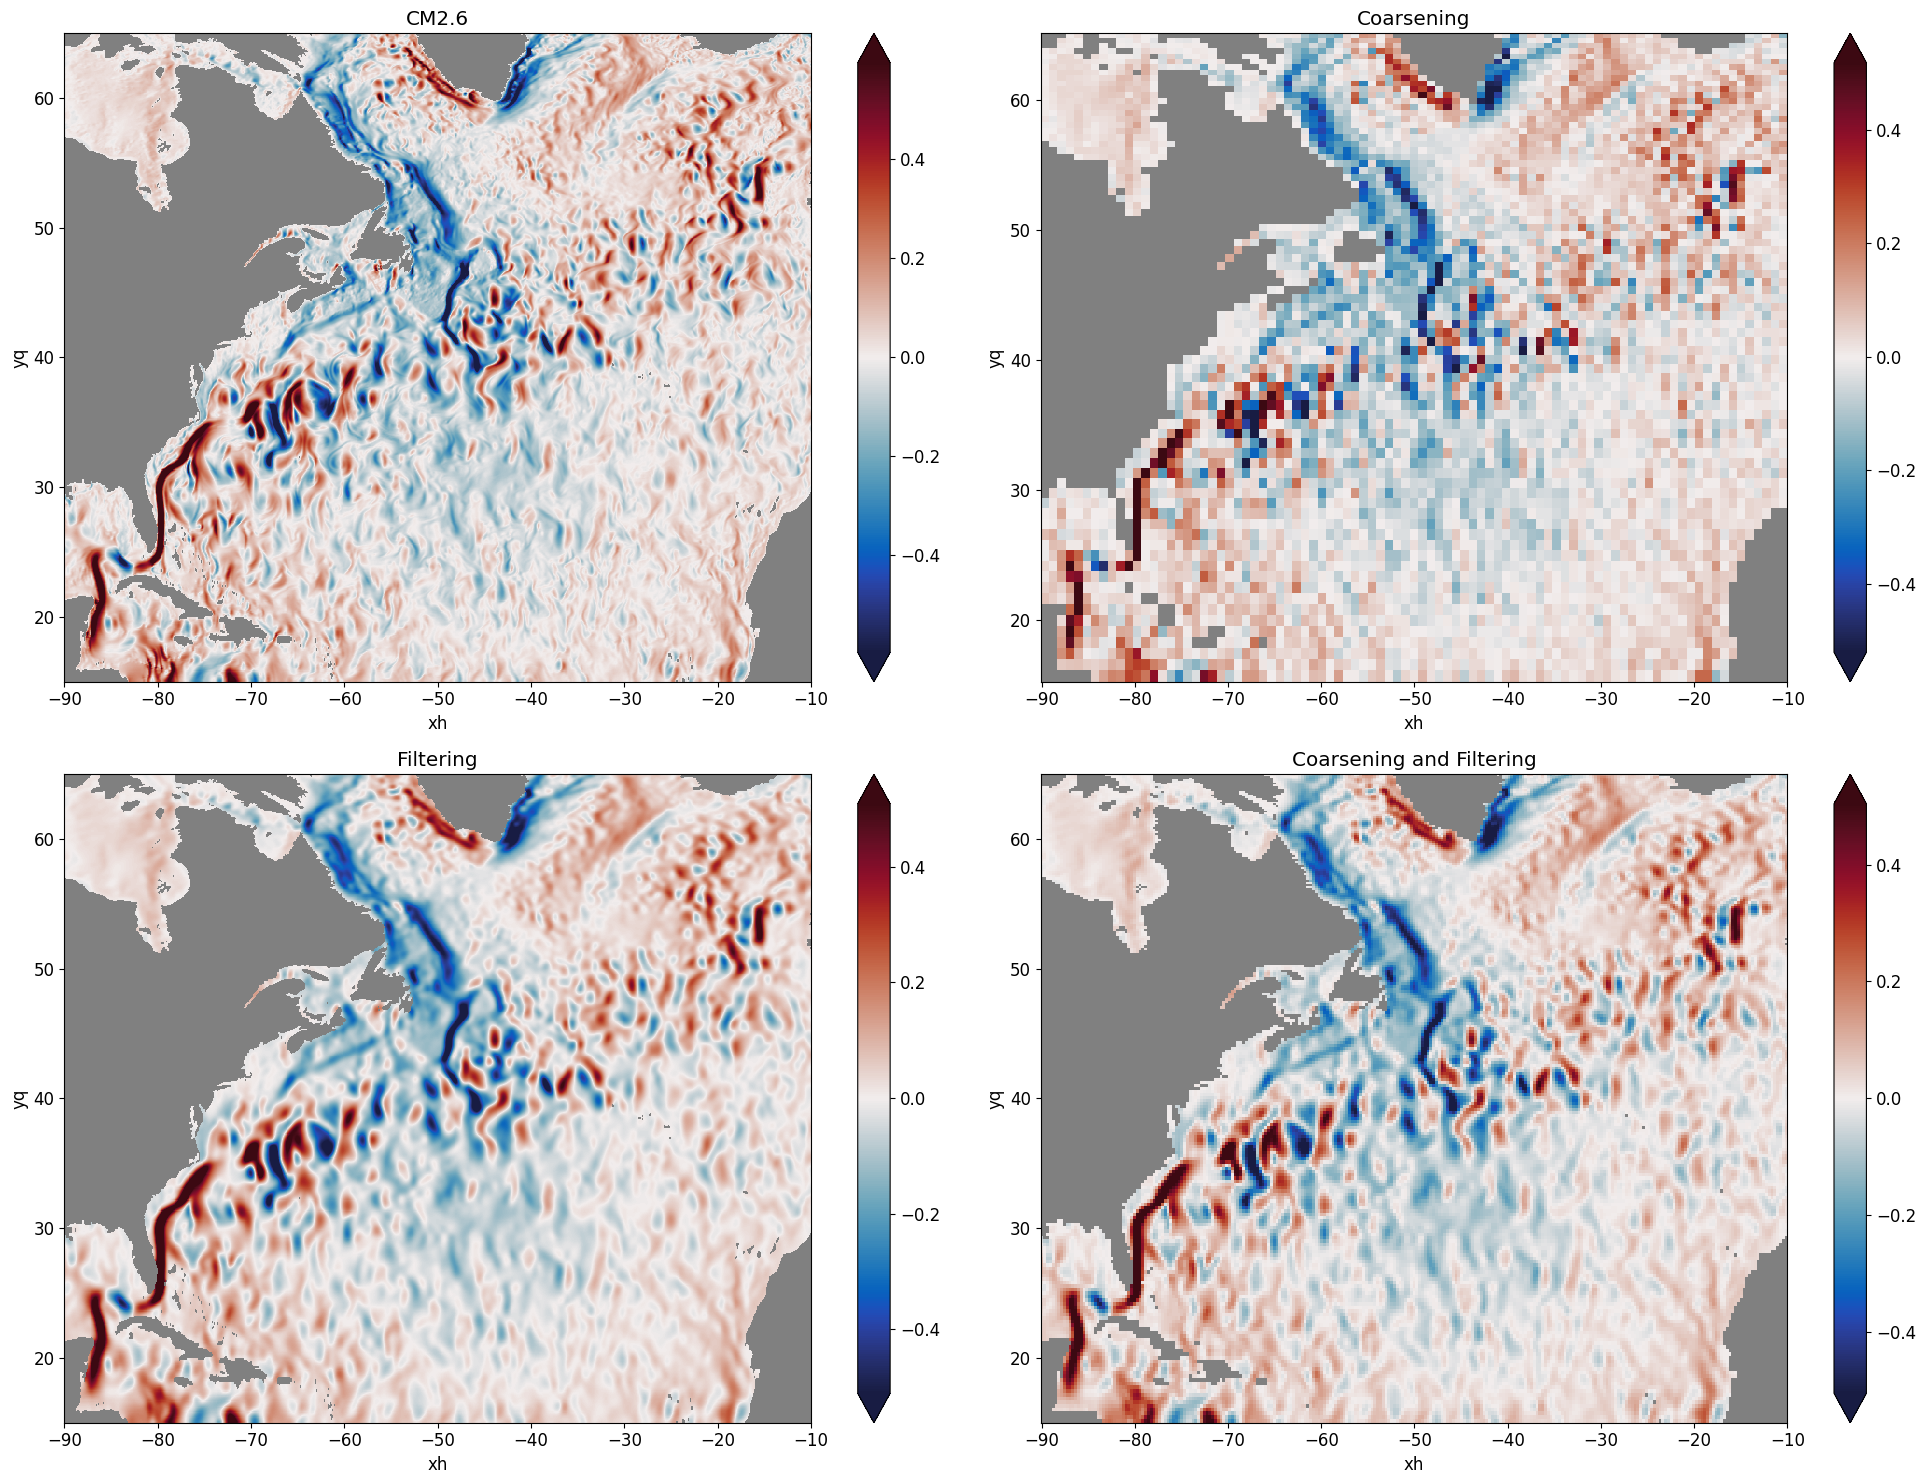

In [47]:
plt.figure(figsize=(20,15))
plt.rcParams['font.size'] = 12
plt.subplot(2,2,1)
plot(ds.data.v.isel(time=0,zl=0), ds.param.wet_v[0], cartopy=False)
plt.title('CM2.6')

plt.subplot(2,2,2)
plot(coarse.data.v.isel(time=0,zl=0), coarse.param.wet_v[0], cartopy=False)
plt.title('Coarsening')

plt.subplot(2,2,3)
plot(filter.data.v.isel(time=0,zl=0), filter.param.wet_v[0], cartopy=False)
plt.title('Filtering')

plt.subplot(2,2,4)
plot(coarse_filter.data.v.isel(time=0,zl=0), coarse_filter.param.wet_v[0], cartopy=False)
plt.title('Coarsening and Filtering')

plt.tight_layout()

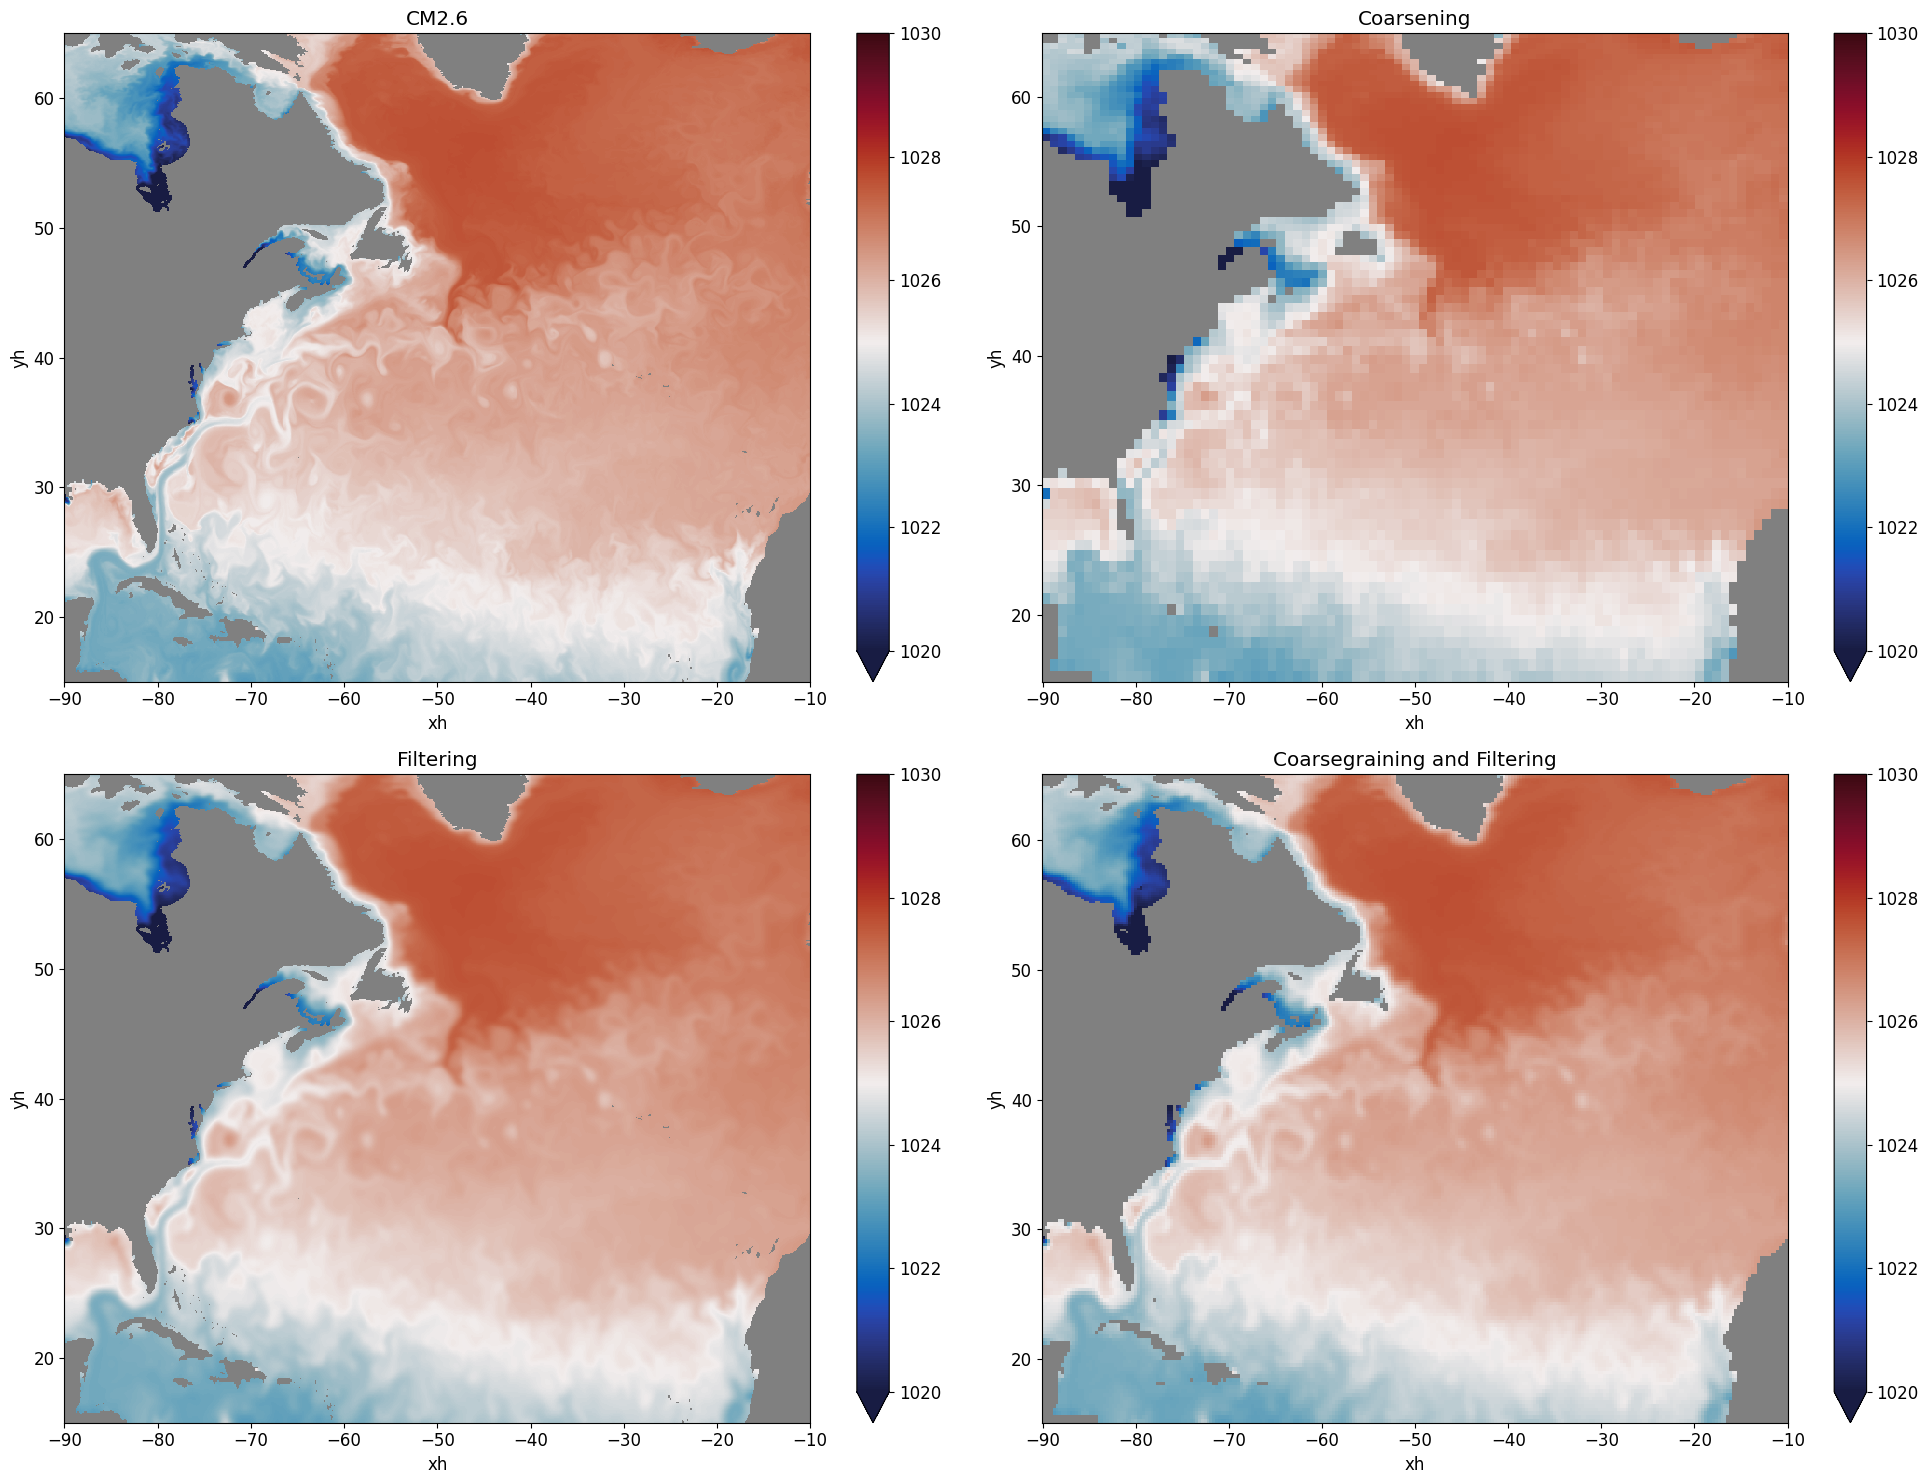

In [48]:
plt.figure(figsize=(20,15))
plt.rcParams['font.size'] = 12
plt.subplot(2,2,1)
plot(ds.state.rho().isel(time=0,zl=0), ds.param.wet[0], cartopy=False, vmin=1020, vmax=1030)
plt.title('CM2.6')
    
plt.subplot(2,2,2)
plot(coarse.state.rho().isel(time=0,zl=0), coarse.param.wet[0], cartopy=False, vmin=1020, vmax=1030)
plt.title('Coarsening')

plt.subplot(2,2,3)
plot(filter.state.rho().isel(time=0,zl=0), filter.param.wet[0], cartopy=False, vmin=1020, vmax=1030)
plt.title('Filtering')

plt.subplot(2,2,4)
plot(coarse_filter.state.rho().isel(time=0,zl=0), coarse_filter.param.wet[0], cartopy=False, vmin=1020, vmax=1030)
plt.title('Coarsegraining and Filtering')

plt.tight_layout()

(1024.0, 1028.0)

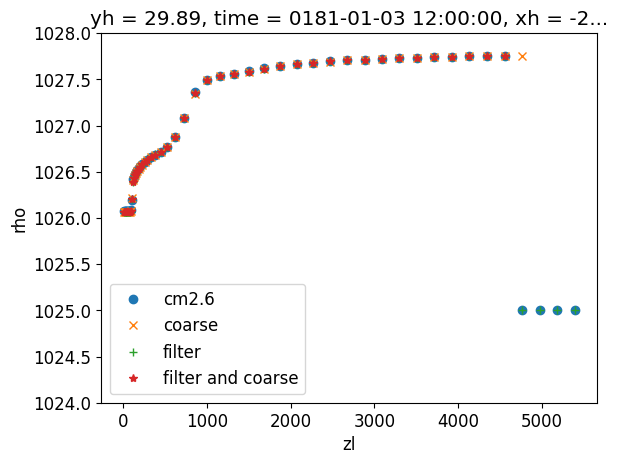

In [60]:
ds.state.rho().isel(time=0).sel({'xh':-30, 'yh':30},method='nearest').plot(ls='',marker='o',label='cm2.6')
coarse.state.rho().isel(time=0).sel({'xh':-30, 'yh':30},method='nearest').plot(ls='',marker='x',label='coarse')
filter.state.rho().isel(time=0).sel({'xh':-30, 'yh':30},method='nearest').plot(ls='',marker='+',label='filter')
coarse_filter.state.rho().isel(time=0).sel({'xh':-30, 'yh':30},method='nearest').plot(ls='',marker='*',label='filter and coarse')
plt.legend()
plt.ylim([1024,1028])

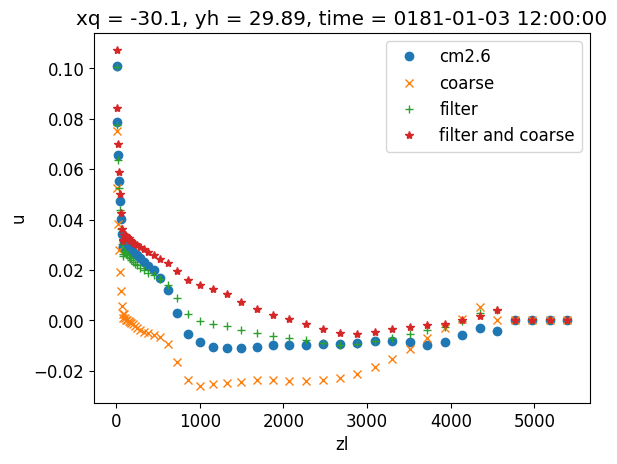

In [72]:
ds.data.u.isel(time=0).sel({'xq':-30, 'yh':30},method='nearest').plot(ls='',marker='o',label='cm2.6')
coarse.data.u.isel(time=0).sel({'xq':-30, 'yh':30},method='nearest').plot(ls='',marker='x',label='coarse')
filter.data.u.isel(time=0).sel({'xq':-30, 'yh':30},method='nearest').plot(ls='',marker='+',label='filter')
coarse_filter.data.u.isel(time=0).sel({'xq':-30, 'yh':30},method='nearest').plot(ls='',marker='*',label='filter and coarse')
plt.legend()

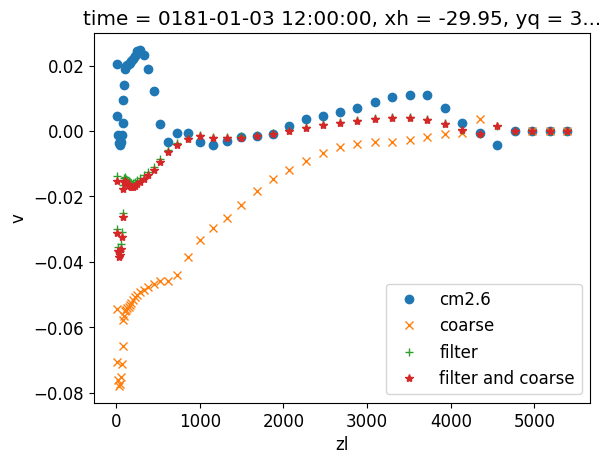

In [73]:
ds.data.v.isel(time=0).sel({'xh':-30, 'yq':30},method='nearest').plot(ls='',marker='o',label='cm2.6')
coarse.data.v.isel(time=0).sel({'xh':-30, 'yq':30},method='nearest').plot(ls='',marker='x',label='coarse')
filter.data.v.isel(time=0).sel({'xh':-30, 'yq':30},method='nearest').plot(ls='',marker='+',label='filter')
coarse_filter.data.v.isel(time=0).sel({'xh':-30, 'yq':30},method='nearest').plot(ls='',marker='*',label='filter and coarse')
plt.legend()

In [61]:
rho = ds.state.rho().isel(zl=0,time=0).compute()

In [62]:
areaT = ds.param.dxT * ds.param.dyT
filter_with_area = gcm_filters.Filter(
    filter_scale=9,
    dx_min=1,
    grid_type=gcm_filters.GridType.REGULAR_WITH_LAND_AREA_WEIGHTED,
    grid_vars={'area': areaT, 'wet_mask': ds.param.wet[0]}
    )

filter_without_area = gcm_filters.Filter(
    filter_scale=9,
    dx_min=1,
    grid_type=gcm_filters.GridType.REGULAR_WITH_LAND,
    grid_vars={'wet_mask': ds.param.wet[0]}
    )

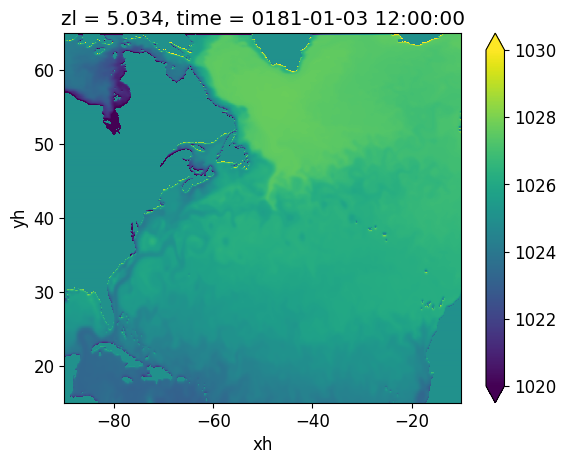

In [64]:
select_NA(filter_with_area.apply(rho, dims=['yh', 'xh']).compute()).plot(vmin=1020,vmax=1030)

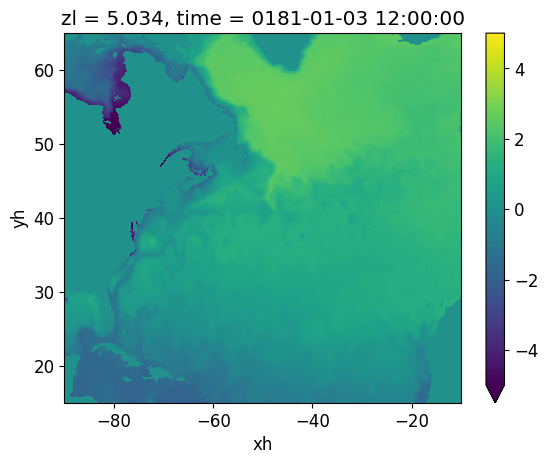

In [66]:
select_NA(filter_with_area.apply(rho-1025, dims=['yh', 'xh']).compute()).plot(vmin=-5,vmax=5, cmap='viridis')

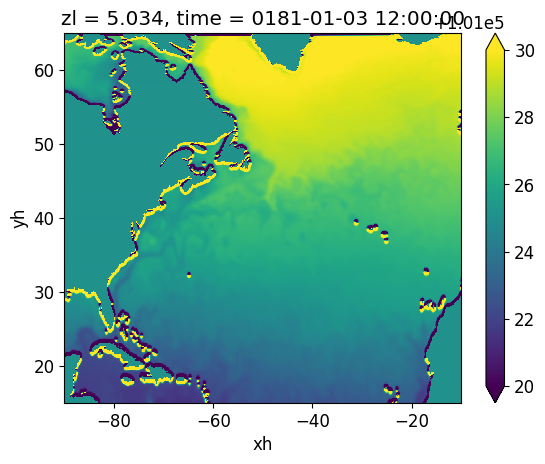

In [71]:
select_NA(filter_with_area.apply(rho+1e+5, dims=['yh', 'xh']).compute()).plot(vmin=1e+5+1020,vmax=1e+5+1030)

# Dataset preparation

In [2]:
%%time 
ds = DatasetCM26(source='cmip6-3d')

CPU times: user 29.5 s, sys: 10.5 s, total: 40 s
Wall time: 37.3 s


In [3]:
%time coarse_dataset = ds.compute_subfilter_forcing(factor=4, FGR_multiplier=3, coarsening=CoarsenKochkovMinMax(), percentile=0.5)

CPU times: user 1min 15s, sys: 5.79 s, total: 1min 20s
Wall time: 1min 17s


In [4]:
%time data = coarse_dataset.state.prepare_features()

CPU times: user 4.76 s, sys: 344 ms, total: 5.11 s
Wall time: 5.12 s


In [5]:
data

<xarray.Dataset>
Dimensions:             (xq: 900, yh: 675, zl: 50, time: 1460, xh: 900, yq: 675)
Coordinates:
  * xq                  (xq) float64 -279.6 -279.2 -278.8 ... 79.2 79.6 80.0
  * yh                  (yh) float64 -81.05 -80.88 -80.71 ... 89.58 89.75 89.92
  * zl                  (zl) float64 5.034 15.1 25.22 ... 5.185e+03 5.395e+03
  * time                (time) object 0181-01-03 12:00:00 ... 0200-12-28 12:0...
  * xh                  (xh) float64 -279.8 -279.4 -279.0 ... 79.0 79.4 79.8
  * yq                  (yq) float64 -80.96 -80.79 -80.62 ... 89.66 89.83 90.0
    zi                  float64 5.5e+03
Data variables:
    u                   (zl, yh, xq, time) float64 dask.array<chunksize=(1, 675, 900, 1), meta=np.ndarray>
    v                   (zl, yq, xh, time) float64 dask.array<chunksize=(1, 675, 900, 1), meta=np.ndarray>
    rho                 (zl, yh, xh, time) float64 dask.array<chunksize=(1, 675, 900, 1), meta=np.ndarray>
    SGSx                (zl, yh, xq, time) float64 dask.array<chunksize=(1, 675, 900, 1), meta=np.ndarray>
    SGSy                (zl, yq, xh, time) float64 dask.array<chunksize=(1, 675, 900, 1), meta=np.ndarray>
    deformation_radius  (yh, xh, time) float64 dask.array<chunksize=(675, 900, 1), meta=np.ndarray>
    eady_time           (yh, xh, time) float64 dask.array<chunksize=(675, 900, 1), meta=np.ndarray>
    rescaled_depth      (yh, xh, time, zl) float64 dask.array<chunksize=(675, 900, 1, 50), meta=np.ndarray>

In [7]:
%time batch = data.isel(time=0).compute()

CPU times: user 20min 52s, sys: 17min 39s, total: 38min 32s
Wall time: 5min 54s


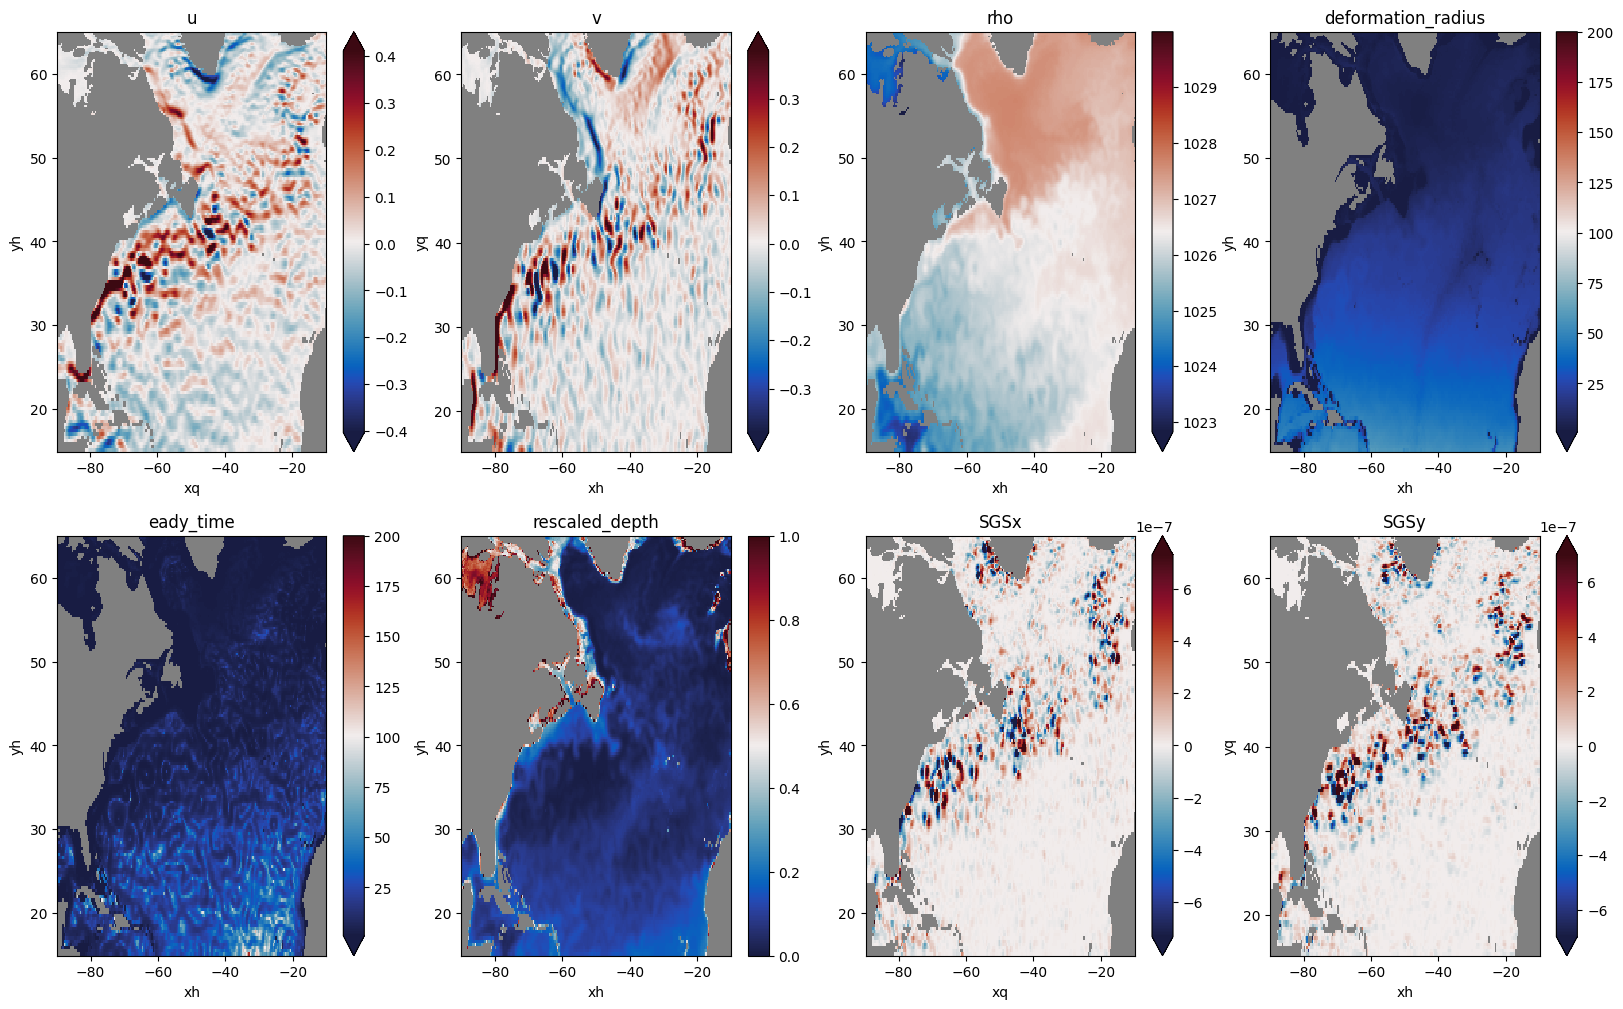

In [15]:
plt.figure(figsize=(20,12))
for key, wet, j in zip(['u', 'v', 'rho', 'deformation_radius', 'eady_time', 'rescaled_depth', 'SGSx', 'SGSy'], 
                       ['wet_u', 'wet_v', 'wet', 'wet', 'wet', 'wet', 'wet_u', 'wet_v'], np.arange(8)):
    plt.subplot(2,4,j+1)
    variable = batch[key]
    wet = coarse_dataset.param[wet]
    if 'zl' in batch[key].dims:
        variable = variable.isel(zl=10)
        wet = wet[10]
    else:
        wet = wet[0]
    vmin=None
    vmax=None
    if key == 'deformation_radius':
        variable = variable / 1e+3
        vmin=1
        vmax=200
    if key == 'eady_time':
        variable = variable / 86400
        vmin = 1
        vmax = 200
    if key == 'rescaled_depth':
        vmin=0; vmax=1
    plot(variable, wet, cartopy=False,vmin=vmin,vmax=vmax)
    plt.title(key)

# Subset of depth faster to compute?

In [251]:
depth_selector = lambda x: x.isel(zl=np.arange(0,50,5))

In [30]:
%time batch_subset = data.isel(time=0,zl=np.arange(0,50,5)).compute()

CPU times: user 12min 1s, sys: 6min 17s, total: 18min 18s
Wall time: 2min 54s


In [253]:
depth_selector(data).zl

<xarray.DataArray 'zl' (zl: 10)>
array([   5.03355 ,   55.853249,  110.096153,  181.312454,  330.007751,
        728.692078, 1497.56189 , 2474.042969, 3508.633057, 4555.565918])
Coordinates:
  * zl       (zl) float64 5.034 55.85 110.1 ... 2.474e+03 3.509e+03 4.556e+03
    zi       float64 5.5e+03

# Time selection

## Training dataset: 8 years

In [254]:
import cftime
train_selector = lambda x: x.sel(time=slice(cftime.DatetimeJulian(181,1,1),cftime.DatetimeJulian(189,1,1))).isel(time=slice(0,None,6))
train_selector(depth_selector(data))

<xarray.Dataset>
Dimensions:             (xq: 900, yh: 675, zl: 10, time: 98, xh: 900, yq: 675)
Coordinates:
  * xq                  (xq) float64 -279.6 -279.2 -278.8 ... 79.2 79.6 80.0
  * yh                  (yh) float64 -81.05 -80.88 -80.71 ... 89.58 89.75 89.92
  * zl                  (zl) float64 5.034 55.85 110.1 ... 3.509e+03 4.556e+03
  * time                (time) object 0181-01-03 12:00:00 ... 0188-12-23 12:0...
  * xh                  (xh) float64 -279.8 -279.4 -279.0 ... 79.0 79.4 79.8
  * yq                  (yq) float64 -80.96 -80.79 -80.62 ... 89.66 89.83 90.0
    zi                  float64 5.5e+03
Data variables:
    u                   (zl, yh, xq, time) float64 dask.array<chunksize=(1, 675, 900, 1), meta=np.ndarray>
    v                   (zl, yq, xh, time) float64 dask.array<chunksize=(1, 675, 900, 1), meta=np.ndarray>
    rho                 (zl, yh, xh, time) float64 dask.array<chunksize=(1, 675, 900, 1), meta=np.ndarray>
    SGSx                (zl, yh, xq, time) float64 dask.array<chunksize=(1, 675, 900, 1), meta=np.ndarray>
    SGSy                (zl, yq, xh, time) float64 dask.array<chunksize=(1, 675, 900, 1), meta=np.ndarray>
    deformation_radius  (yh, xh, time) float64 dask.array<chunksize=(675, 900, 1), meta=np.ndarray>
    eady_time           (yh, xh, time) float64 dask.array<chunksize=(675, 900, 1), meta=np.ndarray>
    rescaled_depth      (yh, xh, time, zl) float64 dask.array<chunksize=(675, 900, 1, 10), meta=np.ndarray>

In [255]:
train_selector(data).time

<xarray.DataArray 'time' (time: 98)>
array([cftime.DatetimeJulian(181, 1, 3, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(181, 2, 2, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(181, 3, 4, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(181, 4, 3, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(181, 5, 3, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(181, 6, 2, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(181, 7, 2, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(181, 8, 1, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(181, 8, 31, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(181, 9, 30, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(181, 10, 30, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(181, 11, 29, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(181, 12, 29, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(182, 1, 28, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(182, 2, 27, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(182, 3, 29, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(182, 4, 28, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(182, 5, 28, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(182, 6, 27, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(182, 7, 27, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(182, 8, 26, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(182, 9, 25, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(182, 10, 25, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(182, 11, 24, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(182, 12, 24, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(183, 1, 23, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(183, 2, 22, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(183, 3, 24, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(183, 4, 23, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(183, 5, 23, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(183, 6, 22, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(183, 7, 22, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(183, 8, 21, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(183, 9, 20, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(183, 10, 20, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(183, 11, 19, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(183, 12, 19, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(184, 1, 18, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(184, 2, 17, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(184, 3, 18, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(184, 4, 17, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(184, 5, 17, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(184, 6, 16, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(184, 7, 16, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(184, 8, 15, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(184, 9, 14, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(184, 10, 14, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(184, 11, 13, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(184, 12, 13, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(185, 1, 13, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(185, 2, 12, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(185, 3, 14, 12, 0, 0, 0, has_year_zero=False),
       

## Validation dataset: 1 year

In [257]:
validation_selector = lambda x: x.sel(time=slice(cftime.DatetimeJulian(194,1,1),cftime.DatetimeJulian(195,1,1))).isel(time=slice(0,None,6))

In [261]:
validation_selector(data).time

<xarray.DataArray 'time' (time: 13)>
array([cftime.DatetimeJulian(194, 1, 3, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(194, 2, 2, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(194, 3, 4, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(194, 4, 3, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(194, 5, 3, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(194, 6, 2, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(194, 7, 2, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(194, 8, 1, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(194, 8, 31, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(194, 9, 30, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(194, 10, 30, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(194, 11, 29, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(194, 12, 29, 12, 0, 0, 0, has_year_zero=False)],
      dtype=object)
Coordinates:
  * time     (time) object 0194-01-03 12:00:00 ... 0194-12-29 12:00:00
    zi       float64 5.5e+03

# Testing dataset: 2 years

In [264]:
test_selector = lambda x: x.sel(time=slice(cftime.DatetimeJulian(199,1,1),cftime.DatetimeJulian(201,1,1))).isel(time=slice(0,None,6))

In [265]:
test_selector(data).time

<xarray.DataArray 'time' (time: 25)>
array([cftime.DatetimeJulian(199, 1, 3, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(199, 2, 2, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(199, 3, 4, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(199, 4, 3, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(199, 5, 3, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(199, 6, 2, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(199, 7, 2, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(199, 8, 1, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(199, 8, 31, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(199, 9, 30, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(199, 10, 30, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(199, 11, 29, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(199, 12, 29, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(200, 1, 28, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(200, 2, 27, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(200, 3, 28, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(200, 4, 27, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(200, 5, 27, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(200, 6, 26, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(200, 7, 26, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(200, 8, 25, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(200, 9, 24, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(200, 10, 24, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(200, 11, 23, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(200, 12, 23, 12, 0, 0, 0, has_year_zero=False)],
      dtype=object)
Coordinates:
  * time     (time) object 0199-01-03 12:00:00 ... 0200-12-23 12:00:00
    zi       float64 5.5e+03

In [266]:
test_selector(depth_selector(data))

<xarray.Dataset>
Dimensions:             (xq: 900, yh: 675, zl: 10, time: 25, xh: 900, yq: 675)
Coordinates:
  * xq                  (xq) float64 -279.6 -279.2 -278.8 ... 79.2 79.6 80.0
  * yh                  (yh) float64 -81.05 -80.88 -80.71 ... 89.58 89.75 89.92
  * zl                  (zl) float64 5.034 55.85 110.1 ... 3.509e+03 4.556e+03
  * time                (time) object 0199-01-03 12:00:00 ... 0200-12-23 12:0...
  * xh                  (xh) float64 -279.8 -279.4 -279.0 ... 79.0 79.4 79.8
  * yq                  (yq) float64 -80.96 -80.79 -80.62 ... 89.66 89.83 90.0
    zi                  float64 5.5e+03
Data variables:
    u                   (zl, yh, xq, time) float64 dask.array<chunksize=(1, 675, 900, 1), meta=np.ndarray>
    v                   (zl, yq, xh, time) float64 dask.array<chunksize=(1, 675, 900, 1), meta=np.ndarray>
    rho                 (zl, yh, xh, time) float64 dask.array<chunksize=(1, 675, 900, 1), meta=np.ndarray>
    SGSx                (zl, yh, xq, time) float64 dask.array<chunksize=(1, 675, 900, 1), meta=np.ndarray>
    SGSy                (zl, yq, xh, time) float64 dask.array<chunksize=(1, 675, 900, 1), meta=np.ndarray>
    deformation_radius  (yh, xh, time) float64 dask.array<chunksize=(675, 900, 1), meta=np.ndarray>
    eady_time           (yh, xh, time) float64 dask.array<chunksize=(675, 900, 1), meta=np.ndarray>
    rescaled_depth      (yh, xh, time, zl) float64 dask.array<chunksize=(675, 900, 1, 10), meta=np.ndarray>